In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data=pd.read_csv('./fashion-mnist_train.csv').values
test_data=pd.read_csv('./fashion-mnist_test.csv').values

In [ ]:
X_train=train_data[:, 1:]/255
X_test=test_data[:, 1:]/255

y_train=train_data[:, 0]
y_test=test_data[:, 0]

##                                      Visualization

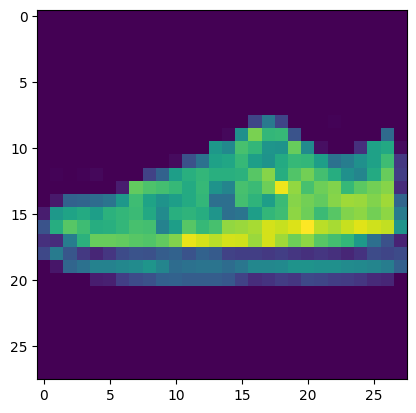

In [ ]:
import random
i=random.randint(0, 6000)
plt.imshow(train_data[i, 1:].reshape(28, 28))

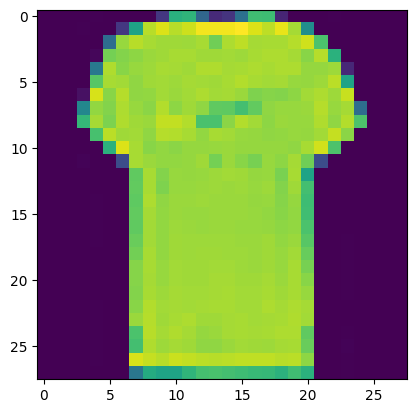

In [ ]:
plt.imshow(train_data[10, 1:].reshape(28, 28))

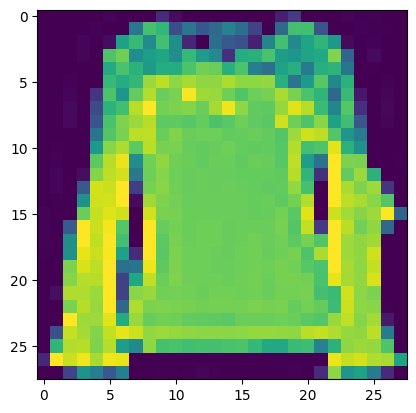

In [ ]:
plt.imshow(train_data[456, 1:].reshape(28, 28))

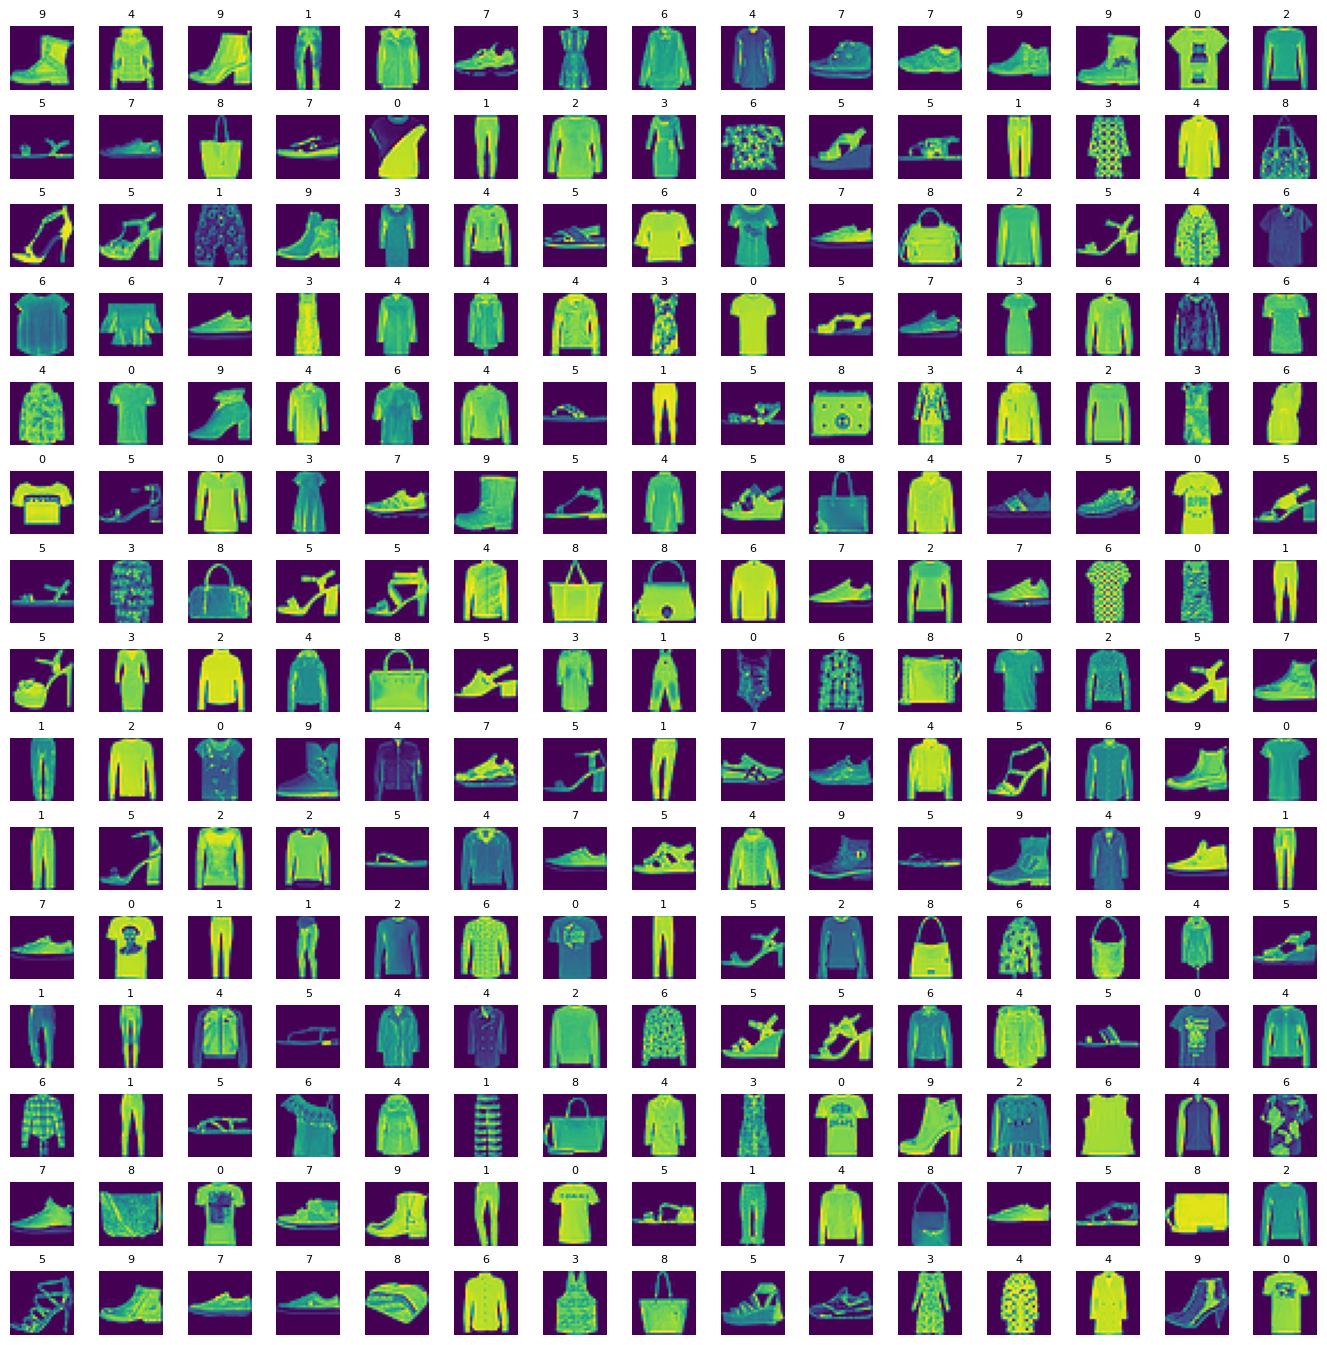

In [ ]:
W_grid=15
L_grid=15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

axes=axes.ravel()

n_training = len(train_data)

for i in np.arange(0, W_grid*L_grid):
    index=np.random.randint(0, n_training)
    axes[i].imshow(train_data[index, 1:].reshape((28, 28)))
    axes[i].set_title(train_data[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Training data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=12345, test_size=.2)

In [ ]:
X_train.shape

(48000, 784)

In [ ]:
X_train=X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test=X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate=X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

/opt/anaconda3/envs/mla2z/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
ephons=50

In [ ]:
cnn_model.fit(X_train, 
              y_train,
              batch_size=512,
              epochs = ephons,
              verbose=1,
              validation_data=(X_validate, y_validate))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5725 - loss: 1.4480 - val_accuracy: 0.7319 - val_loss: 0.7830
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7561 - loss: 0.6899 - val_accuracy: 0.7794 - val_loss: 0.6254
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.5960 - val_accuracy: 0.7987 - val_loss: 0.5659
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.5474 - val_accuracy: 0.8127 - val_loss: 0.5293
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8145 - loss: 0.5164 - val_accuracy: 0.8179 - val_loss: 0.5100
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8209 - loss: 0.4956 - val_accuracy: 0.8274 - val_loss: 0.4894
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8271 - loss: 0.4766 - val_accuracy: 0.8328 - val_loss: 0.4731
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8323 - loss: 0.4632 - val_accuracy: 0.8360 - val_loss:

# Evaluation

In [ ]:
evaluation=cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8682 - loss: 0.3604


In [ ]:
y_predict=cnn_model.predict(X_test)
predict_classes=np.argmax(y_predict, axis=1)
predict_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


array([0, 1, 2, ..., 8, 8, 1], shape=(10000,))

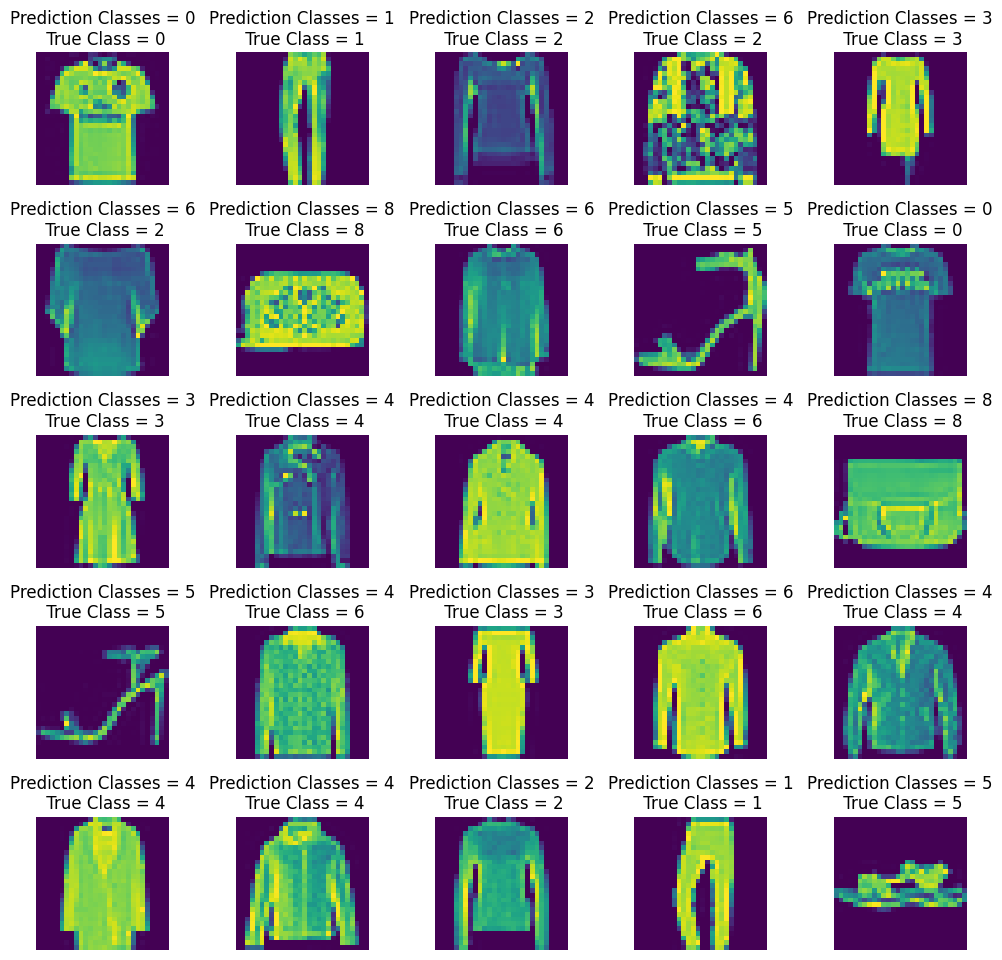

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes=axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Classes = {}\n True Class = {}".format(predict_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

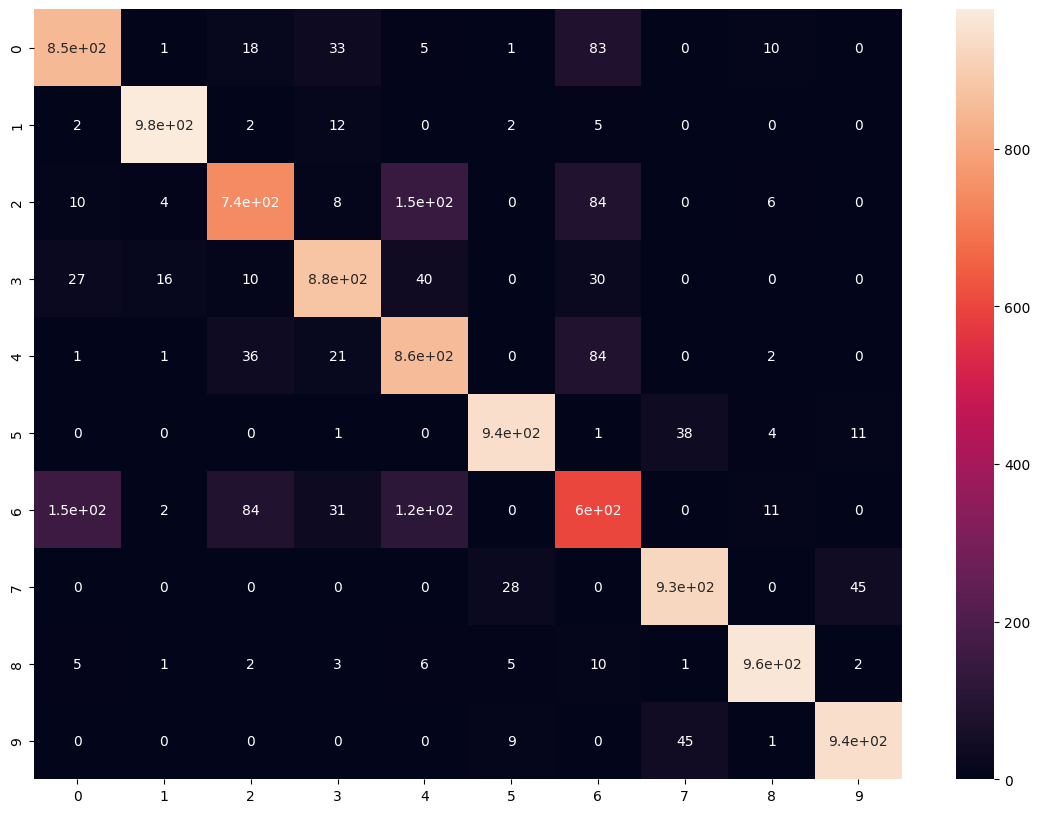

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predict_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)